In [14]:
#!/opt/miniconda3/bin/python

import pygmt
import json	# for reading bird plate-boundary data
import numpy as np
from os.path import exists as file_exists
#import slab2bird as sb   # loads slab2bird dictionary

In [15]:
# For plot read in topography for basemap and choose fonts
pygmt.config(FONT='10p,Times-Roman,black')
pygmt.config(FONT_LABEL='10p,Times-Roman,black')
pygmt.config(FONT_TITLE='10p,Times-Roman,black')
pygmt.config(MAP_TITLE_OFFSET='6.0p')
pygmt.config(FORMAT_GEO_MAP="ddd")

In [16]:
# Set Regional Map dimensions
west = -143.0
east = -100.0
south = 32.0
north = 58.0
region_data = np.array([west, east, south, north])

dlon_edge = 0.35
dlat_edge = 1.0
region1 = str(west) + '/' + str(east) + '/' + str(south) + '/' + str(north) 
print('Region: ', region1)

# Get center position and two latitude locations to define regional projection
clon = np.floor(region_data[0:2].mean())
clat = np.floor(region_data[2:4].mean())
lat1 = np.floor(0.5*(north - clat) + clat )
lat2 = np.floor(clat - 0.5*(clat - south) )

mapwidth = 4.5 # inches, sets size of figure on page
proj1 = 'B' + str(clon) + '/' + str(clat) + '/' + str(lat1) + '/' + str(lat2) + '/' + str(mapwidth) + 'i'
print("proj1: ", proj1)

Region:  -143.0/-100.0/32.0/58.0
proj1:  B-122.0/45.0/51.0/38.0/4.5i


Plotting topo grid


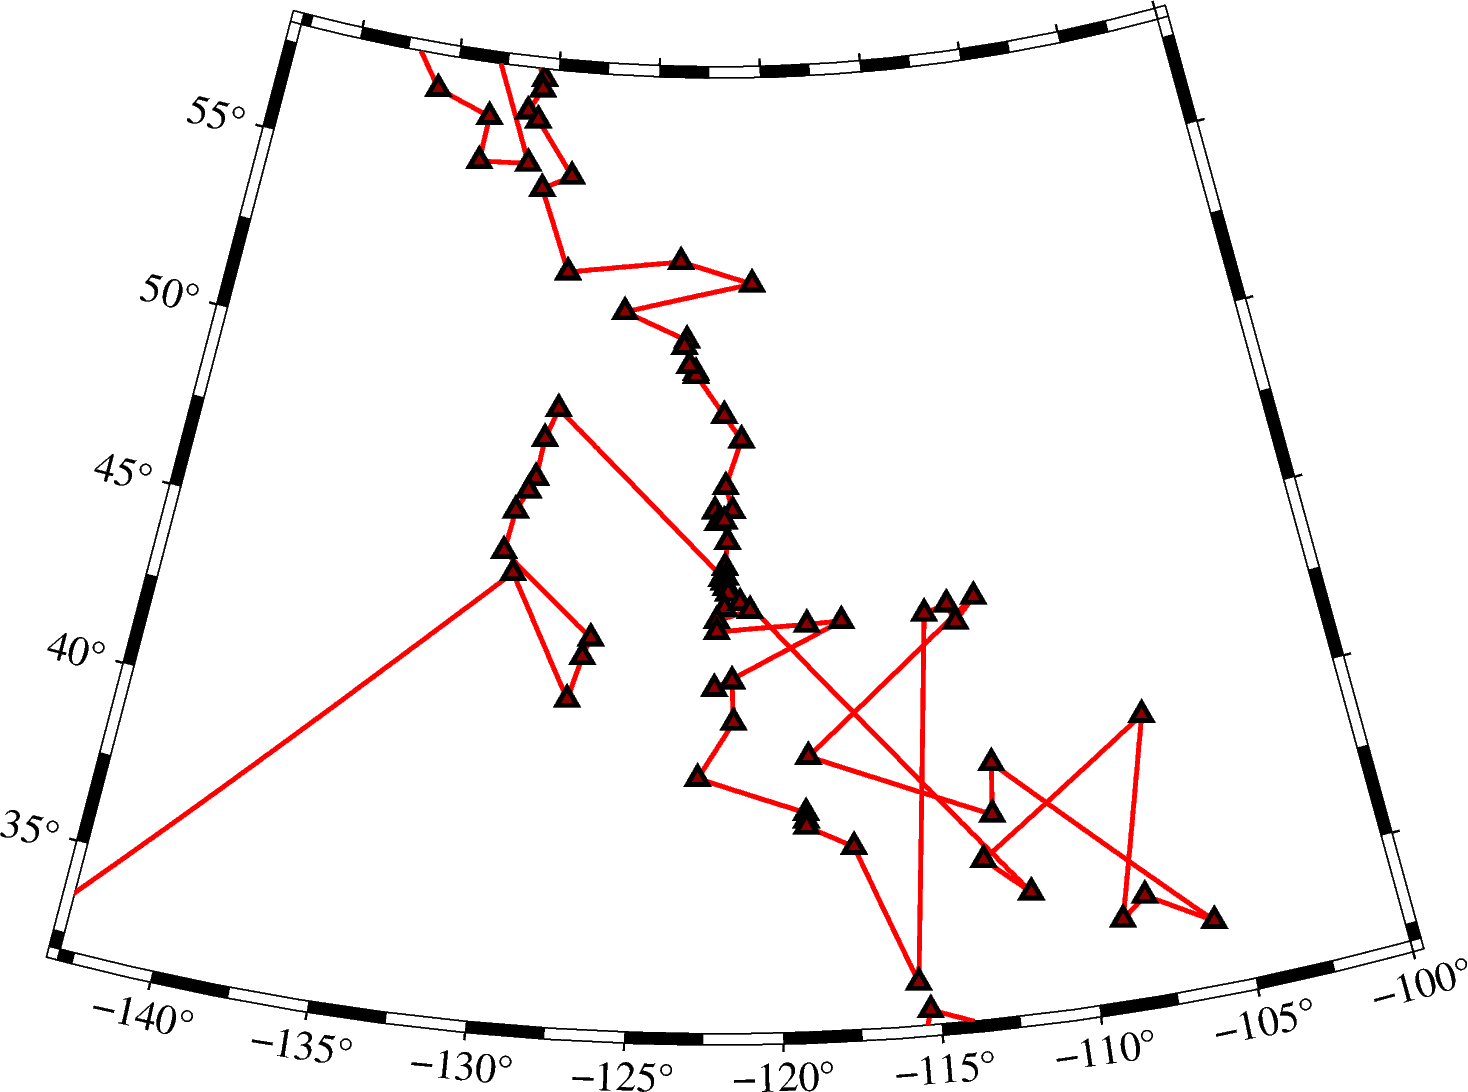

In [19]:
# Start figure
# fig.plot: sources could be plotted in different formats, given by the "pen" or "style" options
fig = pygmt.Figure()
fig.basemap(region=region1, projection=proj1, frame=["a5f2.5", f'WSne'])
print('Plotting topo grid')
fig.plot(data='holocene_volcano_lonlat.dat', pen='1p,red')  # red line connecting volcanoes
fig.plot(data='holocene_volcano_lonlat.dat',style="t0.2c", pen='1p,black',fill='darkred') # volcanoes as triangles.

pdffile = 'volcanos_example.pdf'
fig.savefig(pdffile)
fig.show()